<a href="https://colab.research.google.com/github/noeffortnomoney/CS114.L22.KHCL/blob/main/Final%20Project/Google%20Colab/accuracy_0%2C97.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.image as mpimg

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, TimeDistributed ,LSTM
from tensorflow.keras.utils import to_categorical

In [4]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score
import seaborn as sns

In [5]:
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,\
                        Permute, TimeDistributed, Bidirectional,GRU
from keras.optimizers import RMSprop

In [6]:
import imageio
import imgaug as ia
import imgaug.augmenters as iaa
import numpy as np
import pandas as pd

In [7]:
datadir='/content/gdrive/My Drive/Dataset Chữ viết tay (Final)/dataset chữ viết tay Tiếng Việt (Final)'
dataset=[]

In [8]:
def very_new_contrast(new_arrayzz):
  width , height = new_arrayzz.shape
  new_arrayzzz=new_arrayzz
  for x in range(0,width):
          for y in range(0,height):
              if new_arrayzzz[x,y] >= 210:            
                  new_arrayzzz[x,y] = 255
              elif new_arrayzzz[x,y] <=80 :
                  new_arrayzzz[x,y] = 0
              elif new_arrayzzz[x,y]>80 and new_arrayzzz[x,y]<=100:
                new_arrayzzz[x,y]=new_arrayzzz[x,y]//3-10
              elif new_arrayzzz[x,y]>100 and new_arrayzzz[x,y]<=140:
                new_arrayzzz[x,y]=new_arrayzzz[x,y]//2-30
              elif new_arrayzzz[x,y]>140 and new_arrayzzz[x,y]<190:
                new_arrayzzz[x,y]=new_arrayzzz[x,y]*2//3+10
  return new_arrayzzz

In [9]:
def the_very_last_contrast_layer(new_arrayzz):
  width , height = new_arrayzz.shape
  new_arrayzzz=new_arrayzz
  for x in range(0,width):
          for y in range(0,height):
              if new_arrayzzz[x,y] >= 220:            
                  new_arrayzzz[x,y] = 255
              elif new_arrayzzz[x,y] <=30 :
                  new_arrayzzz[x,y] = 0
              elif new_arrayzzz[x,y]>30 and new_arrayzzz[x,y]<60:
                new_arrayzzz[x,y]=new_arrayzzz[x,y]*2//3-10
              elif new_arrayzzz[x,y]>60 and new_arrayzzz[x,y]<90:
                new_arrayzzz[x,y]=new_arrayzzz[x,y]//2+20
  return new_arrayzzz

In [10]:
def the_last_contrast_layer(new_arrayzz):
  width , height = new_arrayzz.shape
  new_arrayzzz=new_arrayzz
  for x in range(0,width):
          for y in range(0,height):
              if new_arrayzzz[x,y] >= 220:            
                  new_arrayzzz[x,y] = 255
              elif new_arrayzzz[x,y] <=40 :
                  new_arrayzzz[x,y] = 0
              elif new_arrayzzz[x,y]>40 and new_arrayzzz[x,y]<80:
                new_arrayzzz[x,y]=new_arrayzzz[x,y]*2//3-10
  return new_arrayzzz

In [11]:
categories=[]

In [12]:
for label in os.listdir(datadir):
  categories.append(label)

In [13]:
print(len(categories))

89


In [14]:
# for category in categories:
#   path=os.path.join(datadir,category)
#   class_num=categories.index(category)
#   for img in os.listdir(path):
#     IMG_SIZE=28
#     img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
#     try:
#       contrasted_img=very_new_contrast(img_array)
#       blur_img=cv2.blur(contrasted_img,(2,2))
#       new_array=cv2.resize(blur_img,(IMG_SIZE,IMG_SIZE))
#       last_img=the_last_contrast_layer(new_array)
#       reversed_img=cv2.bitwise_not(last_img)
#       dataset.append([reversed_img,class_num])
#     except:
#       pass

In [15]:
for category in categories:
  path=os.path.join(datadir,category)
  class_num=categories.index(category)
  IMG_SIZE=28
  kernel = np.ones((1,1),np.uint8)
  for img in os.listdir(path):
    img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
    try:
      reversed_img=cv2.bitwise_not(img_array)
      blur_img=cv2.GaussianBlur(img_array,(5,5),0)
      resized_img=cv2.resize(blur_img,(IMG_SIZE,IMG_SIZE))
      dataset.append([resized_img,class_num])
    except:
      pass

In [16]:
print(len(dataset))

50114


In [17]:
X=[]
y=[]

In [18]:
import random
random.shuffle(dataset)

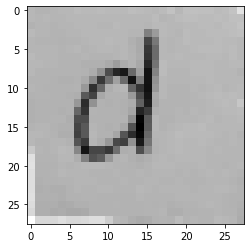

d


In [19]:
plt.imshow(dataset[111][0],cmap='gray')
plt.show()
print(categories[dataset[111][1]])

In [20]:
for feature,label in dataset:
  X.append(feature)
  y.append(label)

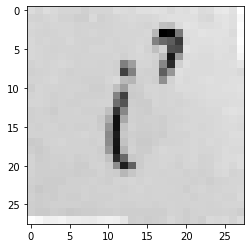

ỉ


In [21]:
plt.imshow(X[46],cmap='gray')
plt.show()
print(categories[y[46]])

In [22]:
rotated_dataset=[]

In [23]:
left_shift_dataset=[]

In [24]:
shift_rotated_dataset=[]

In [25]:
from sklearn.model_selection import train_test_split
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

In [27]:
rotate=iaa.Affine(rotate=(-10, -15),cval=0)
for index in range (len(X_train)):
  rotated_image=rotate.augment_image(X_train[index])
  rotated_dataset.append([rotated_image,y_train[index]])

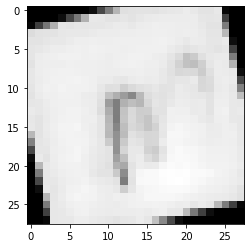

m


In [28]:
plt.imshow(rotated_dataset[39][0],cmap='gray')
plt.show()
print(categories[rotated_dataset[39][1]])

In [29]:
translate=iaa.Affine(translate_percent={"x": (-0.1, -0.05)},cval=0)
for index in range(len(X_train)):
  translated_image=translate.augment_image(X_train[index])
  left_shift_dataset.append([translated_image,y_train[index]])

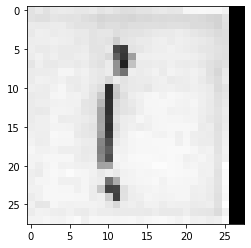

ị


In [30]:
plt.imshow(left_shift_dataset[145][0],cmap='gray')
plt.show()
print(categories[left_shift_dataset[145][1]])

In [31]:
for index in range(len(left_shift_dataset)):
  translated_image=translate.augment_image(left_shift_dataset[index][0])
  shift_rotated_dataset.append([translated_image,left_shift_dataset[index][1]])

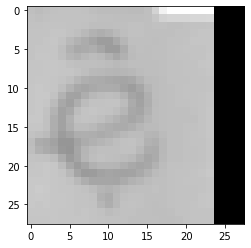

ệ


In [32]:
plt.imshow(shift_rotated_dataset[1450][0],cmap='gray')
plt.show()
print(categories[shift_rotated_dataset[1450][1]])

In [33]:
New_Training_dataset=[]

In [34]:
for index in range (len(rotated_dataset)):
  New_Training_dataset.append([rotated_dataset[index][0],rotated_dataset[index][1]])
for index in range(len(X_train)):
  New_Training_dataset.append([X_train[index],y_train[index]])
for index in range(len(left_shift_dataset)):
  New_Training_dataset.append([left_shift_dataset[index][0],left_shift_dataset[index][1]])
for index in range(len(shift_rotated_dataset)):
  New_Training_dataset.append([shift_rotated_dataset[index][0],shift_rotated_dataset[index][1]])

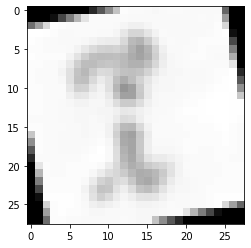

ĩ


In [35]:
plt.imshow(New_Training_dataset[7000][0],cmap='gray')
plt.show()
print(categories[New_Training_dataset[7000][1]])

In [36]:
print(len(New_Training_dataset))

120272


In [37]:
random.shuffle(New_Training_dataset)

In [38]:
X_trainz=[]
y_trainz=[]

In [39]:
for feature,label in New_Training_dataset:
  X_trainz.append(feature)
  y_trainz.append(label)

In [40]:
print(y_trainz[44])

0


In [41]:
print(y_val[55])

2


In [42]:
X_trainz =np.array(X_trainz).reshape(-1,28,28,1)
X_val=np.array(X_val).reshape(-1,28,28,1)
X_test=np.array(X_test).reshape(-1,28,28,1)

In [43]:
print(X_trainz.shape)

(120272, 28, 28, 1)


In [44]:
y_trainz =tf.keras.utils .to_categorical(y_trainz)
y_val = tf.keras.utils.to_categorical(y_val)
y_test =tf.keras.utils.to_categorical(y_test)

In [45]:
print(y_val.shape)

(10023, 89)


In [46]:
X_trainz=X_trainz/255.0
X_val=X_val/255.0
X_test=X_test/255.0

In [47]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,\
                        Permute, TimeDistributed, Bidirectional,GRU
from keras.layers import LeakyReLU
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
hidden_unit = 32
kernel_size = 3

model = Sequential()
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding="Same", activation ='relu',input_shape = (28,28,1)))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding="Same",  activation ='relu'))
model.add(BatchNormalization())

model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 128, kernel_size = (3,3),padding="Same", activation ='relu'))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding="Same", activation ='relu'))
model.add(BatchNormalization())

model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 256, kernel_size = (3,3),padding="Same", activation ='relu'))
model.add(Conv2D(filters = 256, kernel_size = (3,3),padding="Same", activation ='relu'))
model.add(BatchNormalization())

model.add(MaxPool2D(pool_size=(1,2), strides=(1,2)))
model.add(Dropout(0.25))

model.add(TimeDistributed(Flatten()))
model.add(Bidirectional(GRU(hidden_unit,return_sequences=True)))
model.add(Flatten())
model.add(Dense(256 , activation ='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(89, activation = "softmax"))

In [48]:
optimizer = RMSprop(learning_rate=0.01, rho=0.9, epsilon=1e-08, decay=0.0)
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])
filepath="vgg.h5"
learning_rate = ReduceLROnPlateau(monitor='val_loss', 
                                  mode='min',
                                  patience=2, 
                                  verbose=1, 
                                  factor=0.5, 
                                  min_lr=0.00001)
epochs = 30
batch_size = 128

In [49]:
model.compile(optimizer = 'adam' , loss = "categorical_crossentropy", metrics=["accuracy"])

In [50]:
from keras.utils.vis_utils import plot_model

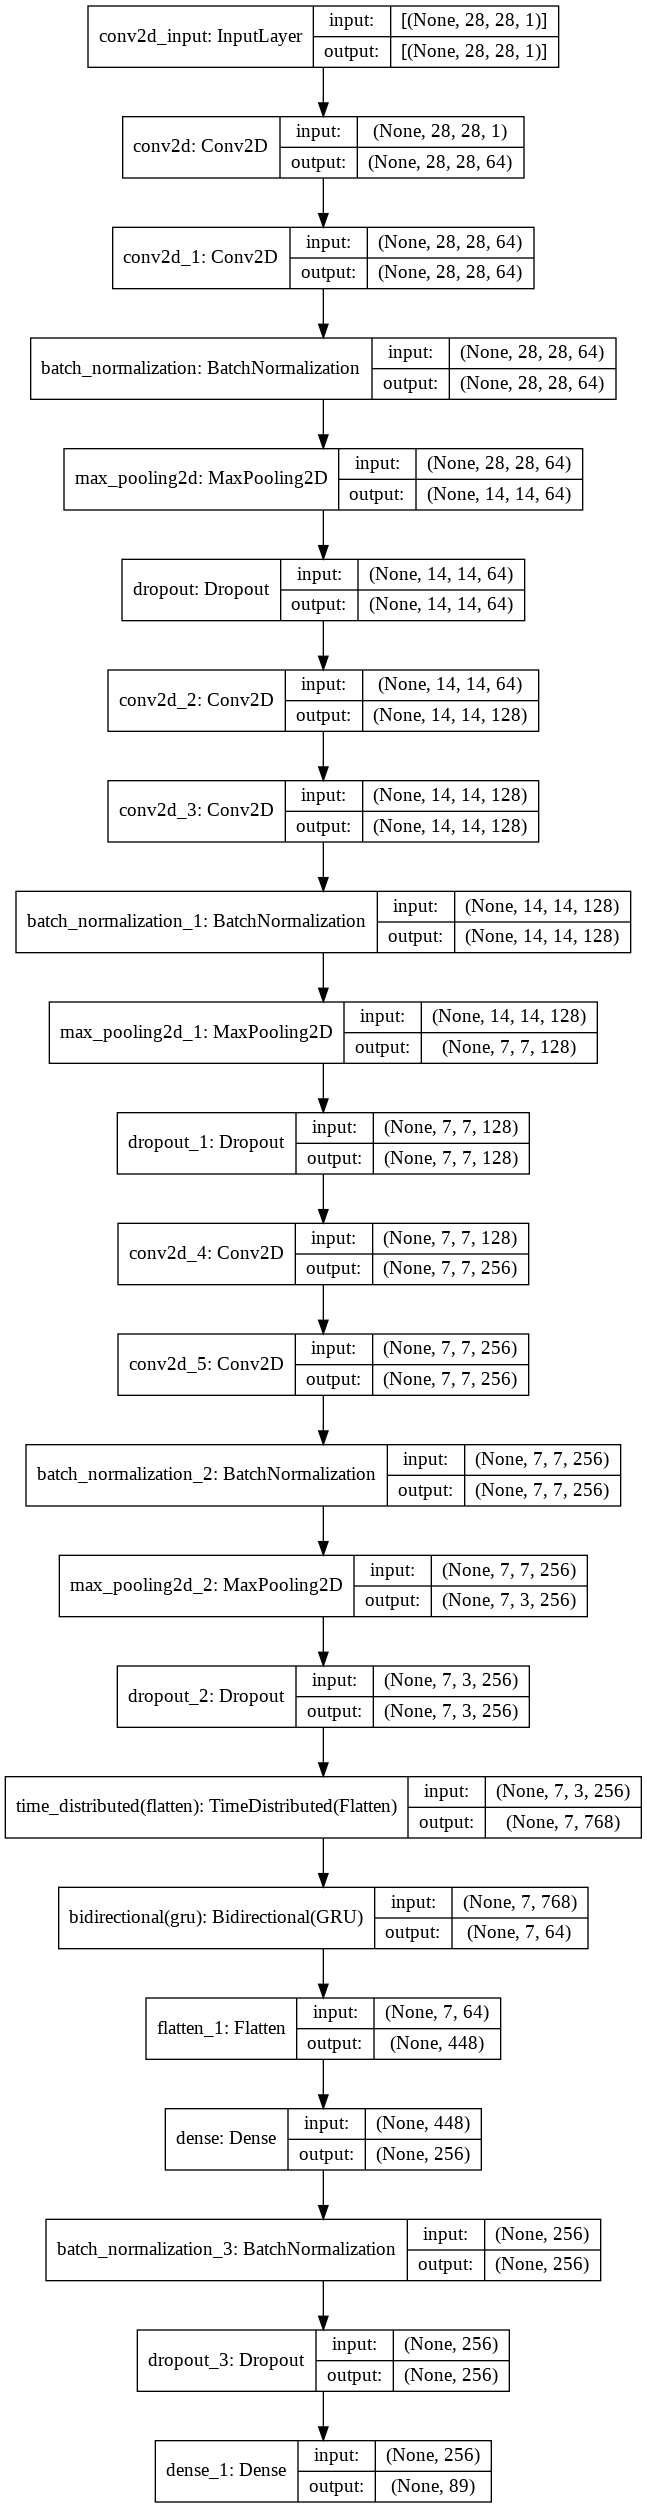

In [51]:
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [52]:
from keras.callbacks import EarlyStopping,ModelCheckpoint

In [53]:
filepath = "vgg.h5"
best_model = ModelCheckpoint(filepath,
                             monitor='val_loss',
                             mode='min',
                             save_best_only=True,
                             verbose=1)

In [54]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 128)       1

In [55]:
batch_size=64
history = model.fit(X_trainz,y_trainz, batch_size=batch_size,
                              epochs = 10, validation_data = (X_val,y_val),
                              verbose = 2, steps_per_epoch=X_trainz.shape[0] // batch_size
                              , callbacks=[best_model])

Epoch 1/10
1879/1879 - 2196s - loss: 3.1238 - accuracy: 0.2781 - val_loss: 0.8784 - val_accuracy: 0.7304

Epoch 00001: val_loss improved from inf to 0.87839, saving model to vgg.h5
Epoch 2/10
1879/1879 - 2159s - loss: 0.5403 - accuracy: 0.8409 - val_loss: 0.3443 - val_accuracy: 0.8966

Epoch 00002: val_loss improved from 0.87839 to 0.34432, saving model to vgg.h5
Epoch 3/10
1879/1879 - 2170s - loss: 0.3257 - accuracy: 0.9040 - val_loss: 0.2797 - val_accuracy: 0.9213

Epoch 00003: val_loss improved from 0.34432 to 0.27965, saving model to vgg.h5
Epoch 4/10
1879/1879 - 2163s - loss: 0.2496 - accuracy: 0.9259 - val_loss: 0.2115 - val_accuracy: 0.9373

Epoch 00004: val_loss improved from 0.27965 to 0.21148, saving model to vgg.h5
Epoch 5/10
1879/1879 - 2297s - loss: 0.2086 - accuracy: 0.9383 - val_loss: 2.2474 - val_accuracy: 0.5782

Epoch 00005: val_loss did not improve from 0.21148
Epoch 6/10
1879/1879 - 2329s - loss: 0.1828 - accuracy: 0.9455 - val_loss: 0.2027 - val_accuracy: 0.9468

E

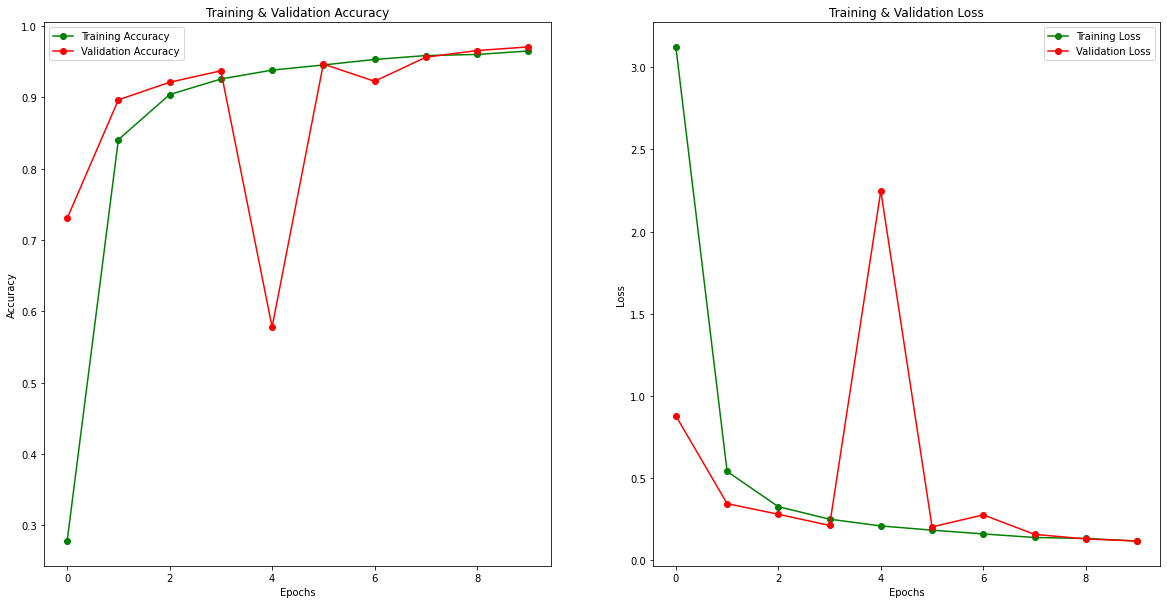

In [56]:
epochs = [i for i in range(10)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'go-' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'ro-' , label = 'Validation Loss')
ax[1].set_title('Training & Validation Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

In [57]:
def display_random_image(class_names, images, labels, desired_labels):
    """
        Display a random image from the images array and its correspond label from the labels array.
    """
    
    index = np.random.randint(images.shape[0])
    plt.figure()
    plt.imshow((tf.squeeze(images[index])),cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    very_desired_labels = np.argmax(desired_labels[index], axis=None, out=None)
    plt.title('Predicted outcome : '+ class_names[labels[index]] + '  Desired outcome : '+ categories[very_desired_labels] )
    plt.show()

In [58]:
test_loss = model.evaluate(X_test, y_test)

314/314 [==============================] - 46s 145ms/step - loss: 0.1191 - accuracy: 0.9718


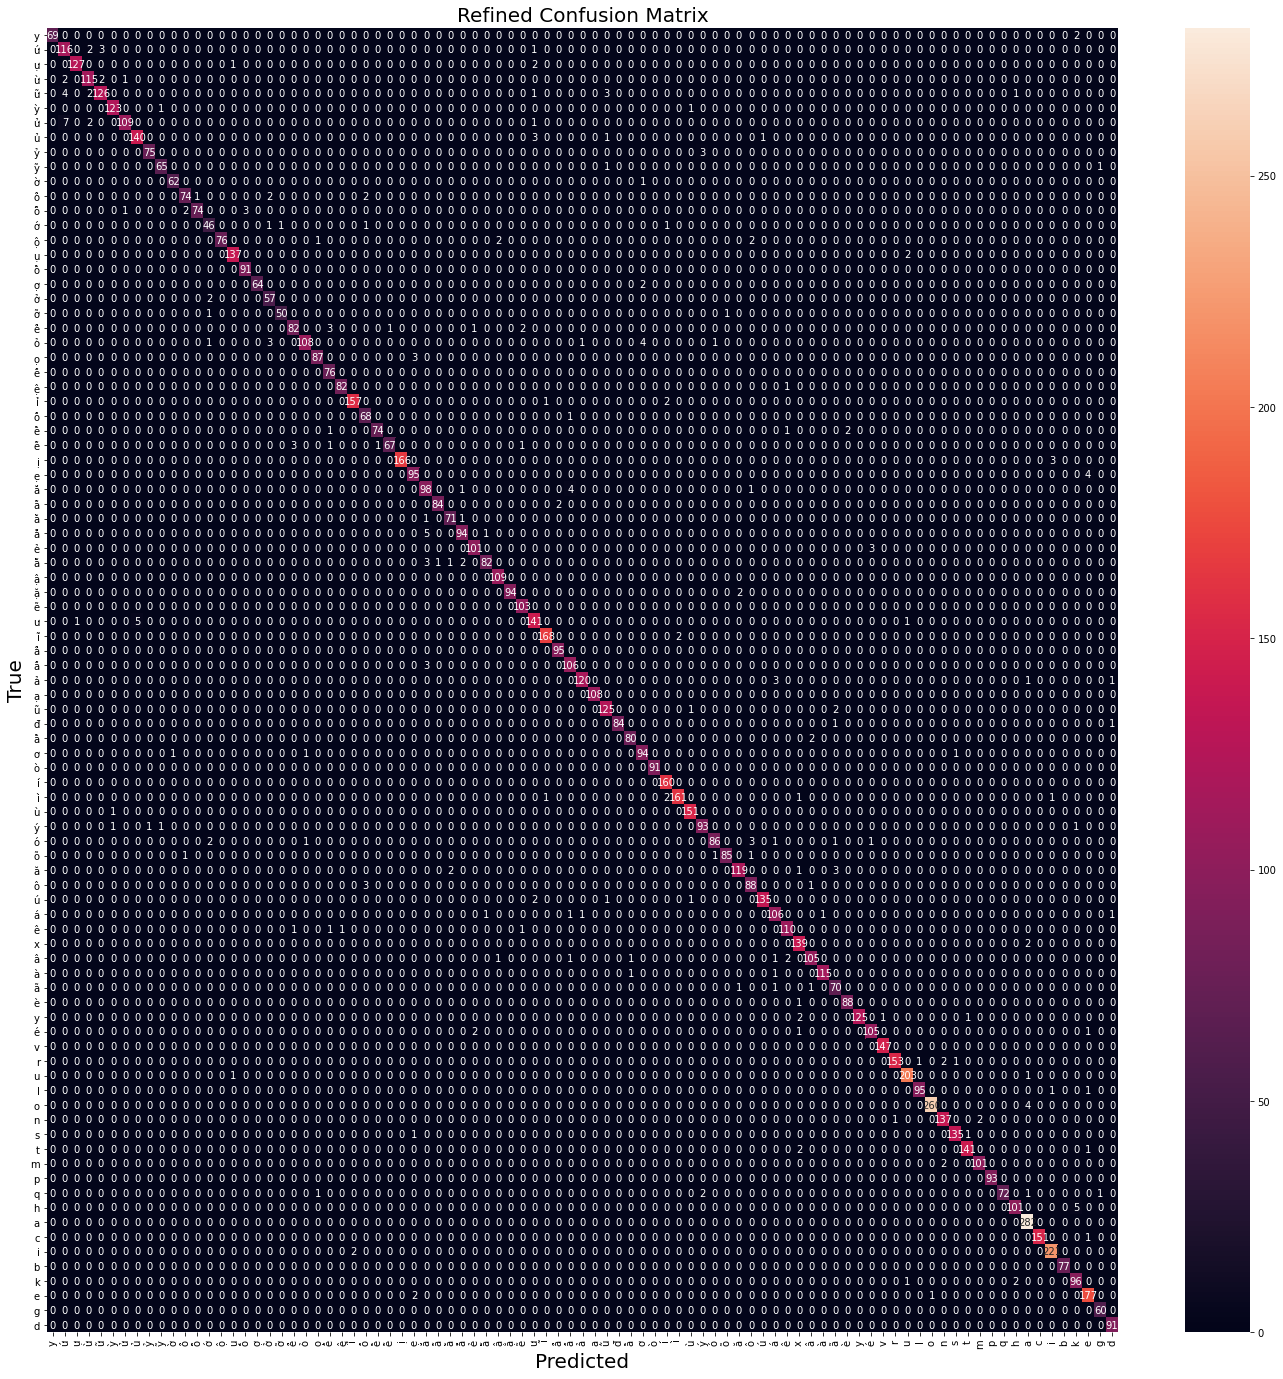

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

### Confusion Matrix
from sklearn.metrics import confusion_matrix
predictions = model.predict(X_test, steps=len(X_val), verbose=0)
#y_pred=model.predict(x_test)
#y_pred = np.round(y_pred)
y_pred = np.argmax(predictions, axis=-1)

y_true=np.argmax(y_test, axis=-1)

cm = confusion_matrix(y_true, y_pred)

## Get Class Labels


# Plot confusion matrix in a beautiful manner
fig = plt.figure(figsize=(24, 24))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(categories, fontsize = 10)
ax.xaxis.tick_bottom()

ax.set_ylabel('True', fontsize=20)
ax.yaxis.set_ticklabels(categories, fontsize = 10)
plt.yticks(rotation=0)

plt.title('Refined Confusion Matrix', fontsize=20)

plt.savefig('ConMat24.png')
plt.show()

In [60]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

In [61]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        71
           1       0.90      0.95      0.92       122
           2       0.99      0.98      0.98       130
           3       0.95      0.96      0.95       120
           4       0.96      0.92      0.94       137
           5       0.98      0.98      0.98       125
           6       0.98      0.92      0.95       119
           7       0.97      0.97      0.97       145
           8       0.99      0.96      0.97        78
           9       0.97      0.97      0.97        67
          10       0.98      0.98      0.98        63
          11       0.96      0.94      0.95        79
          12       0.99      0.93      0.95        80
          13       0.88      0.92      0.90        50
          14       1.00      0.94      0.97        81
          15       0.99      0.99      0.99       139
          16       0.97      1.00      0.98        91
          17       1.00    

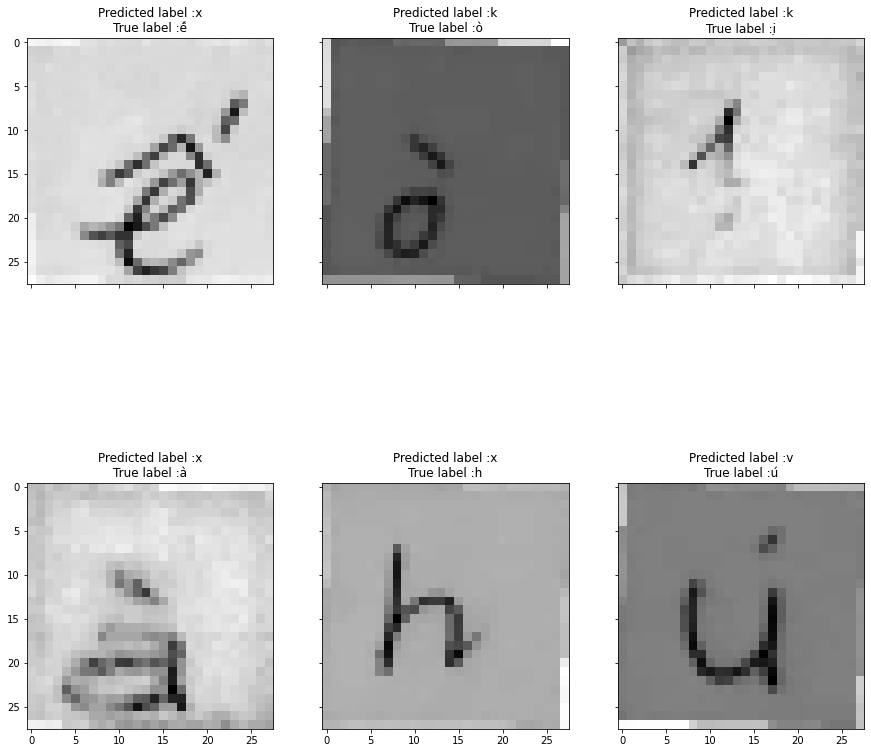

In [62]:
Y_pred = model.predict(X_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_val,axis = 1) 
# compute the confusion matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Display some error results 

# Errors are difference between predicted labels and true labels
errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = Y_pred[errors]
Y_true_errors = Y_true[errors]
X_val_errors = X_val[errors]

def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    """ This function shows 6 images with their predicted and real labels"""
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True,figsize=(15,15))
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((28,28)),cmap='gray')
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(categories[pred_errors[error]],categories[obs_errors[error]]))
            n += 1

# Probabilities of the wrong predicted numbers
Y_pred_errors_prob = np.max(Y_pred_errors,axis = 1)

# Predicted probabilities of the true values in the error set
true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors

# Sorted list of the delta prob errors
sorted_dela_errors = np.argsort(delta_pred_true_errors)

# Top 6 errors 
most_important_errors = sorted_dela_errors[-6:]

# Show the top 6 errors
display_errors(most_important_errors, X_val_errors, Y_pred_classes_errors, Y_true_errors)

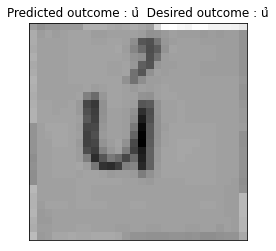

In [63]:
predictions = model.predict(X_test)     # Vector of probabilities
pred_labels = np.argmax(predictions, axis = 1) # We take the highest probability
display_random_image(categories, X_test, pred_labels, y_test)

In [64]:
model.save("vggz" + ".h5")
from google.colab import files
files.download('vggz.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>